# Qualitätssicherung und Erklärbarkeit - Customer Personality

# 1. Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from scipy.stats import zscore
from scipy.stats import probplot
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBRegressor


from sklearn.metrics import mean_absolute_error



pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

sns.set_palette("dark6")
sns.set_theme("notebook")

C:\Users\rhorstmann\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2. Datensatz laden

In [2]:
#CSV Datei laden und DataFrame erstellen
dateipfad = r"C:\Users\rhorstmann\OneDrive - RZIMV.DE\Horstmann\Betriebsintern\Studien\Alt\Qualitätssicherung und Erklärbarkeit in der Datenwissenschaft\Costumer_Personality\marketing_campaign.csv"
df = pd.read_csv(dateipfad, sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


## 3. EDA

## 3.1 Erster Überblick über die Daten

In [3]:
# Anzahl der Zeilen und Spalten im DataFrame
df.shape

(2240, 29)

In [4]:
# Konvertierung von 'Dt_Customer' in DateTime-Format und Anzeige der DataFrame-Informationen
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
# Zusammenfassende Statistik des DataFrames anzeigen
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.16,3246.66,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.81,11.98,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.25,25173.08,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.44,0.54,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.51,0.54,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.11,28.96,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0


In [6]:
# Anzahl der duplizierten Werte in der 'ID'-Spalte
df['ID'].duplicated().sum()

0

In [7]:
# Anzahl der fehlenden Einkommenswerte im Datensatz ermitteln
fehlende_werte = df.isna().sum()

# DataFrame erstellen
tabelle = pd.DataFrame({'Spalte': fehlende_werte.index, 'Anzahl fehlender Werte': fehlende_werte.values})

# Tabelle anzeigen
#print(tabelle)
tabelle

,Spalte,Anzahl fehlender Werte
0,ID,0
1,Year_Birth,0
2,Education,0
3,Marital_Status,0
4,Income,24
5,Kidhome,0
6,Teenhome,0
7,Dt_Customer,0
8,Recency,0
9,MntWines,0


## 3.2 Genauere Analyse der NaN Werte

In [8]:
# Erstellung von zwei DataFrames: df_income_NaN mit fehlenden Einkommenswerten und df_clean ohne diese Werte
df_income_NaN = df[df['Income'].isna()].copy()
df_clean = df.dropna(subset=['Income'])

print('\n')
print('df_income_NaN:')
df_income_NaN



df_income_NaN:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [9]:
df_income_NaN.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ID,24.0,5943.62,3028.35,1295.0,3063.25,5526.5,8597.75,10629.0
Year_Birth,24.0,1967.46,12.02,1943.0,1957.75,1969.5,1974.25,1989.0
Income,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kidhome,24.0,0.67,0.64,0.0,0.00,1.0,1.00,2.0
Teenhome,24.0,0.58,0.58,0.0,0.00,1.0,1.00,2.0
Recency,24.0,58.04,29.49,4.0,35.50,62.0,82.25,96.0
MntWines,24.0,197.21,242.48,5.0,22.00,76.0,286.00,861.0
MntFruits,24.0,21.33,38.31,0.0,1.00,3.5,24.25,138.0
MntMeatProducts,24.0,162.71,339.42,3.0,14.50,35.0,177.00,1607.0
MntFishProducts,24.0,27.17,41.28,0.0,2.00,8.0,40.75,164.0


In [10]:
df_income_NaN.describe().T.round(2).to_csv('beschreibung.csv')

#### Es sieht so aus, als ob die leeren Felder im Einkommen nicht natürlichen Ursprungs sind. Hier könnte ein Modell die fehlenden Werte mithilfe der Einkommensdaten anderer Kunden präzise vorhersagen.

## 3.3 Generierung von Holdout Daten

In [11]:
#Ermittlung von Holdout Daten
df_clean_, df_hold = train_test_split(df_clean, test_size=0.1, random_state=42)

print("Shape of df_clean_:", df_clean_.shape)
print("Shape of df_hold:", df_hold.shape)

Shape of df_clean_: (1994, 29)
Shape of df_hold: (222, 29)


## 3.4 Prüfen auf Ausreißer

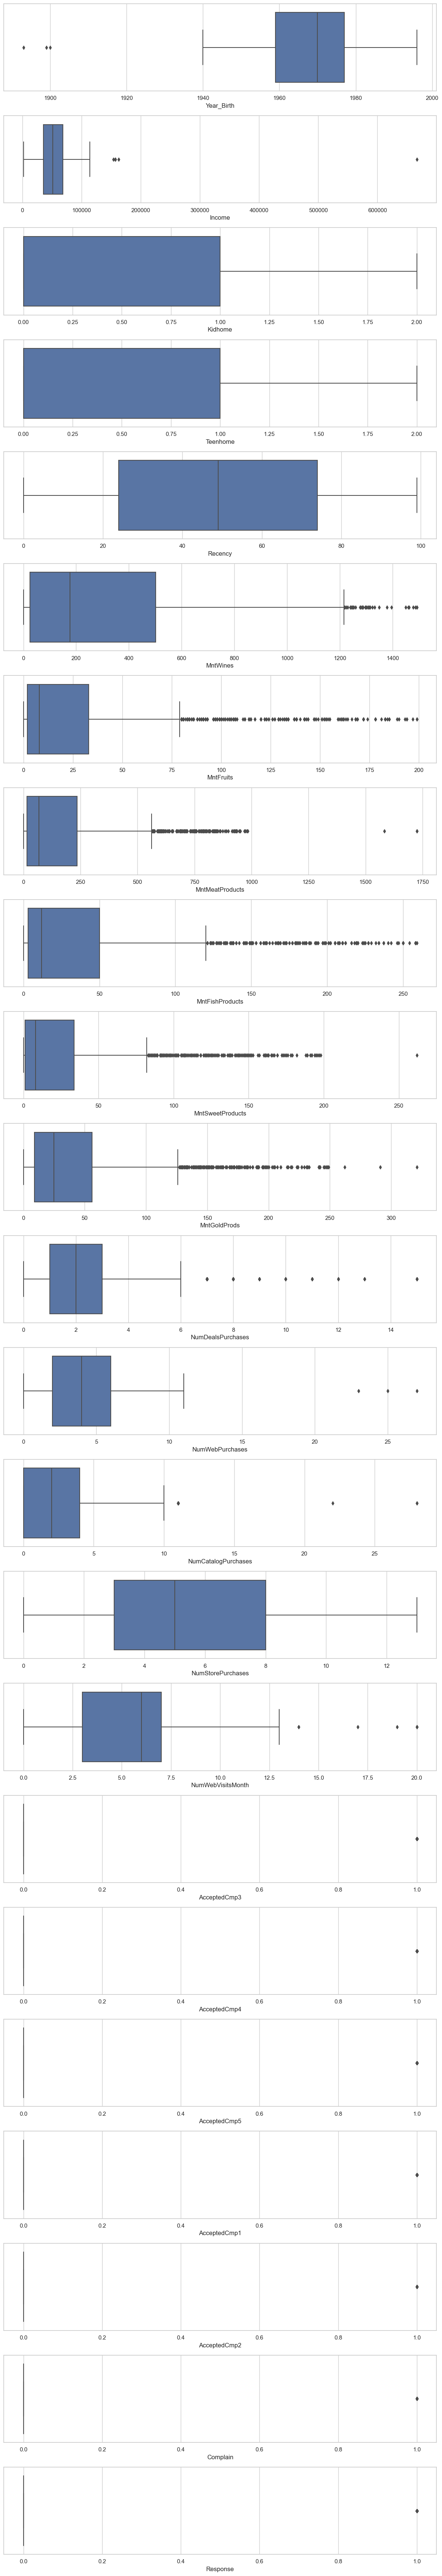

In [12]:
# Boxplots für numerische Spalten im bereinigten DataFrame

# Alle int oder float Spalten auswählen
df_clean_box = df_clean_.loc[:, ['Year_Birth', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']].copy()

sns.set(style="whitegrid")

# Bestimme die Anzahl der Subplots basierend auf der Anzahl der Spalten im DataFrame
num_subplots = len(df_clean_box.columns)

# Erstelle Subplots für jeden Boxplot untereinander
plt.figure(figsize=(12, 3 * num_subplots))

for index, column in enumerate(df_clean_box.columns):
    plt.subplot(num_subplots, 1, index + 1)
    sns.boxplot(x=column, data=df_clean_box)
    plt.xlabel(column)

# Layout anpassen
plt.tight_layout()
plt.show()

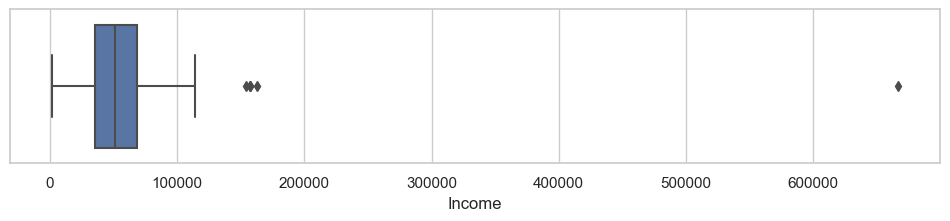

In [13]:
# Erstelle einen Boxplot für die Spalte 'Income' nach der Filterung
plt.figure(figsize=(12, 2))
sns.boxplot(x=df_clean_['Income'])
#plt.title('Boxplot nach Income')

plt.savefig('boxplot_einkommen.pdf', format='pdf', dpi=300)
plt.show()

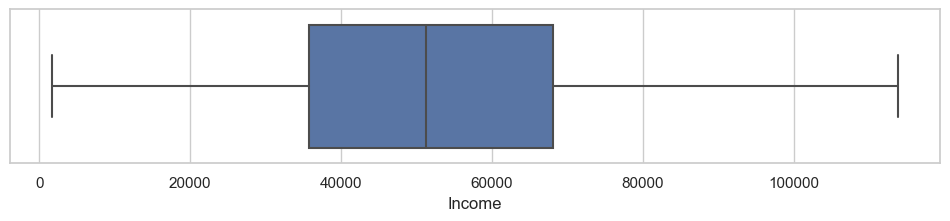

Anzahl der entfernten Werte: 6


In [14]:
# Identifikation und Entfernung von Ausreißern in der Spalte 'Income'

# Berechne Q1 und Q3
q1 = df_clean_['Income'].quantile(0.25)
q3 = df_clean_['Income'].quantile(0.75)

# Berechne die Interquartil-Range (IQR)
iqr = q3 - q1

# Definiere die untere und obere Grenze für Ausreißer
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtere die Werte zwischen Q1 und Q3
df_normal = df_clean_[(df_clean_['Income'] >= lower_bound) & (df_clean_['Income'] <= upper_bound)]

# Berechne die Anzahl der entfernten Werte
removed_values = len(df_clean_) - len(df_normal)

# Erstelle einen Boxplot für die Spalte 'Income' nach der Filterung
plt.figure(figsize=(12, 2))
sns.boxplot(x=df_normal['Income'])
#plt.title('Boxplot nach Filterung der Ausreißer')
plt.show()

# Gebe die Anzahl der entfernten Werte aus
print(f'Anzahl der entfernten Werte: {removed_values}')

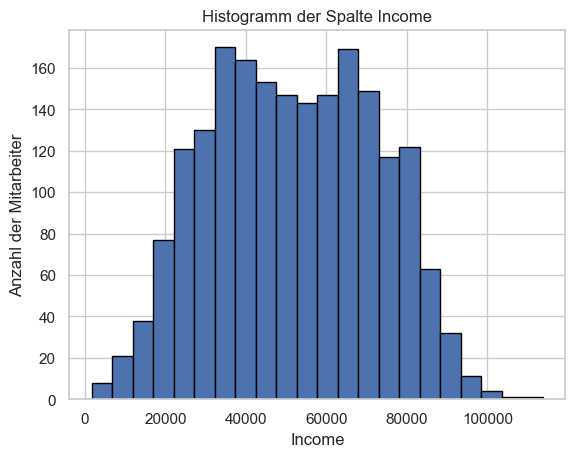

In [15]:
#Visualisierung der Spalte Income als Histogramm. Erste Prüfung auf Normalverteilung.
plt.hist(df_normal['Income'], bins='auto', edgecolor='black')
plt.title('Histogramm der Spalte Income')
plt.xlabel('Income')
plt.ylabel('Anzahl der Mitarbeiter')
plt.show()

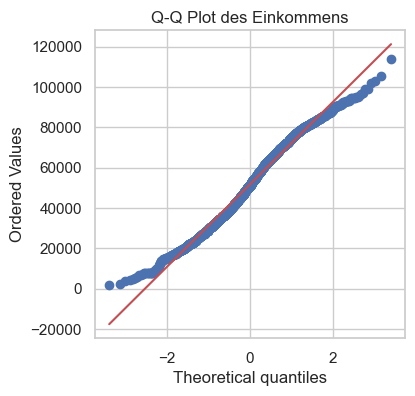

In [16]:
#Visualisierung eines Q-Q Plot. Test auf Normalverteilung
print()
plt.figure(figsize=(4, 4))
probplot(df_normal['Income'], plot=plt)
plt.title('Q-Q Plot des Einkommens')
plt.show()

#### Ohne Ausreißer, kann eine annähernde Normalverteilung der Spalte 'Income' angenommen werden.

## 3.5 Korrelationen

In [17]:
df_EDA = df_normal.copy()

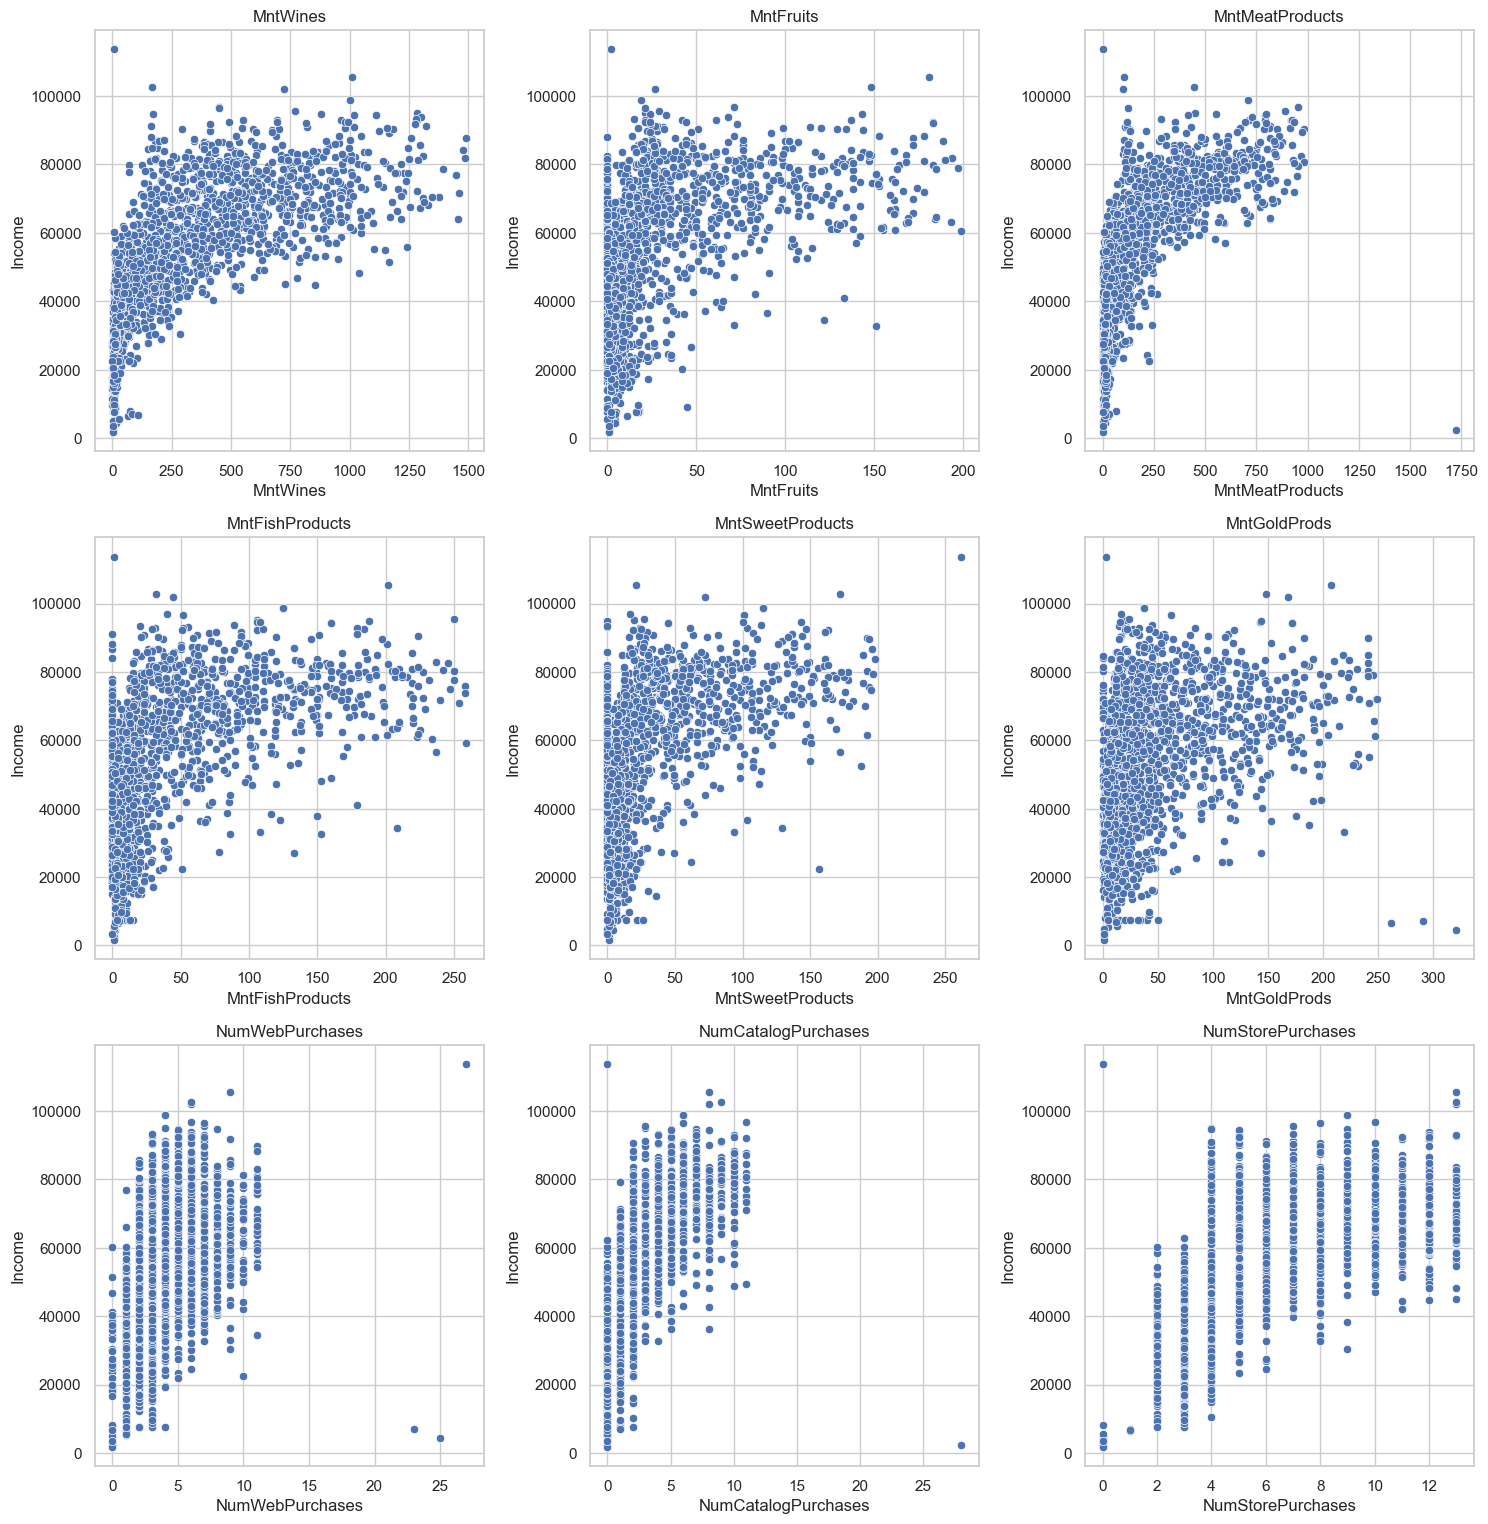

In [18]:
features =               ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                         'NumWebPurchases', 'NumCatalogPurchases',
                         'NumStorePurchases']

# Setze die Größe der Plots
plt.figure(figsize=(15, 20))

# Anzahl der Plots, -1 weil wir 'Income' nicht gegen sich selbst plotten
num_plots = len(features) - 1

# Erstelle für jede Variable einen Scatterplot
for i, feature in enumerate([f for f in features if f != 'Income']):
    plt.subplot((num_plots // 3) + 1, 3, i + 1)
    sns.scatterplot(x=df_EDA[feature], y=df_EDA['Income'])
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Income')

plt.tight_layout()
plt.show()

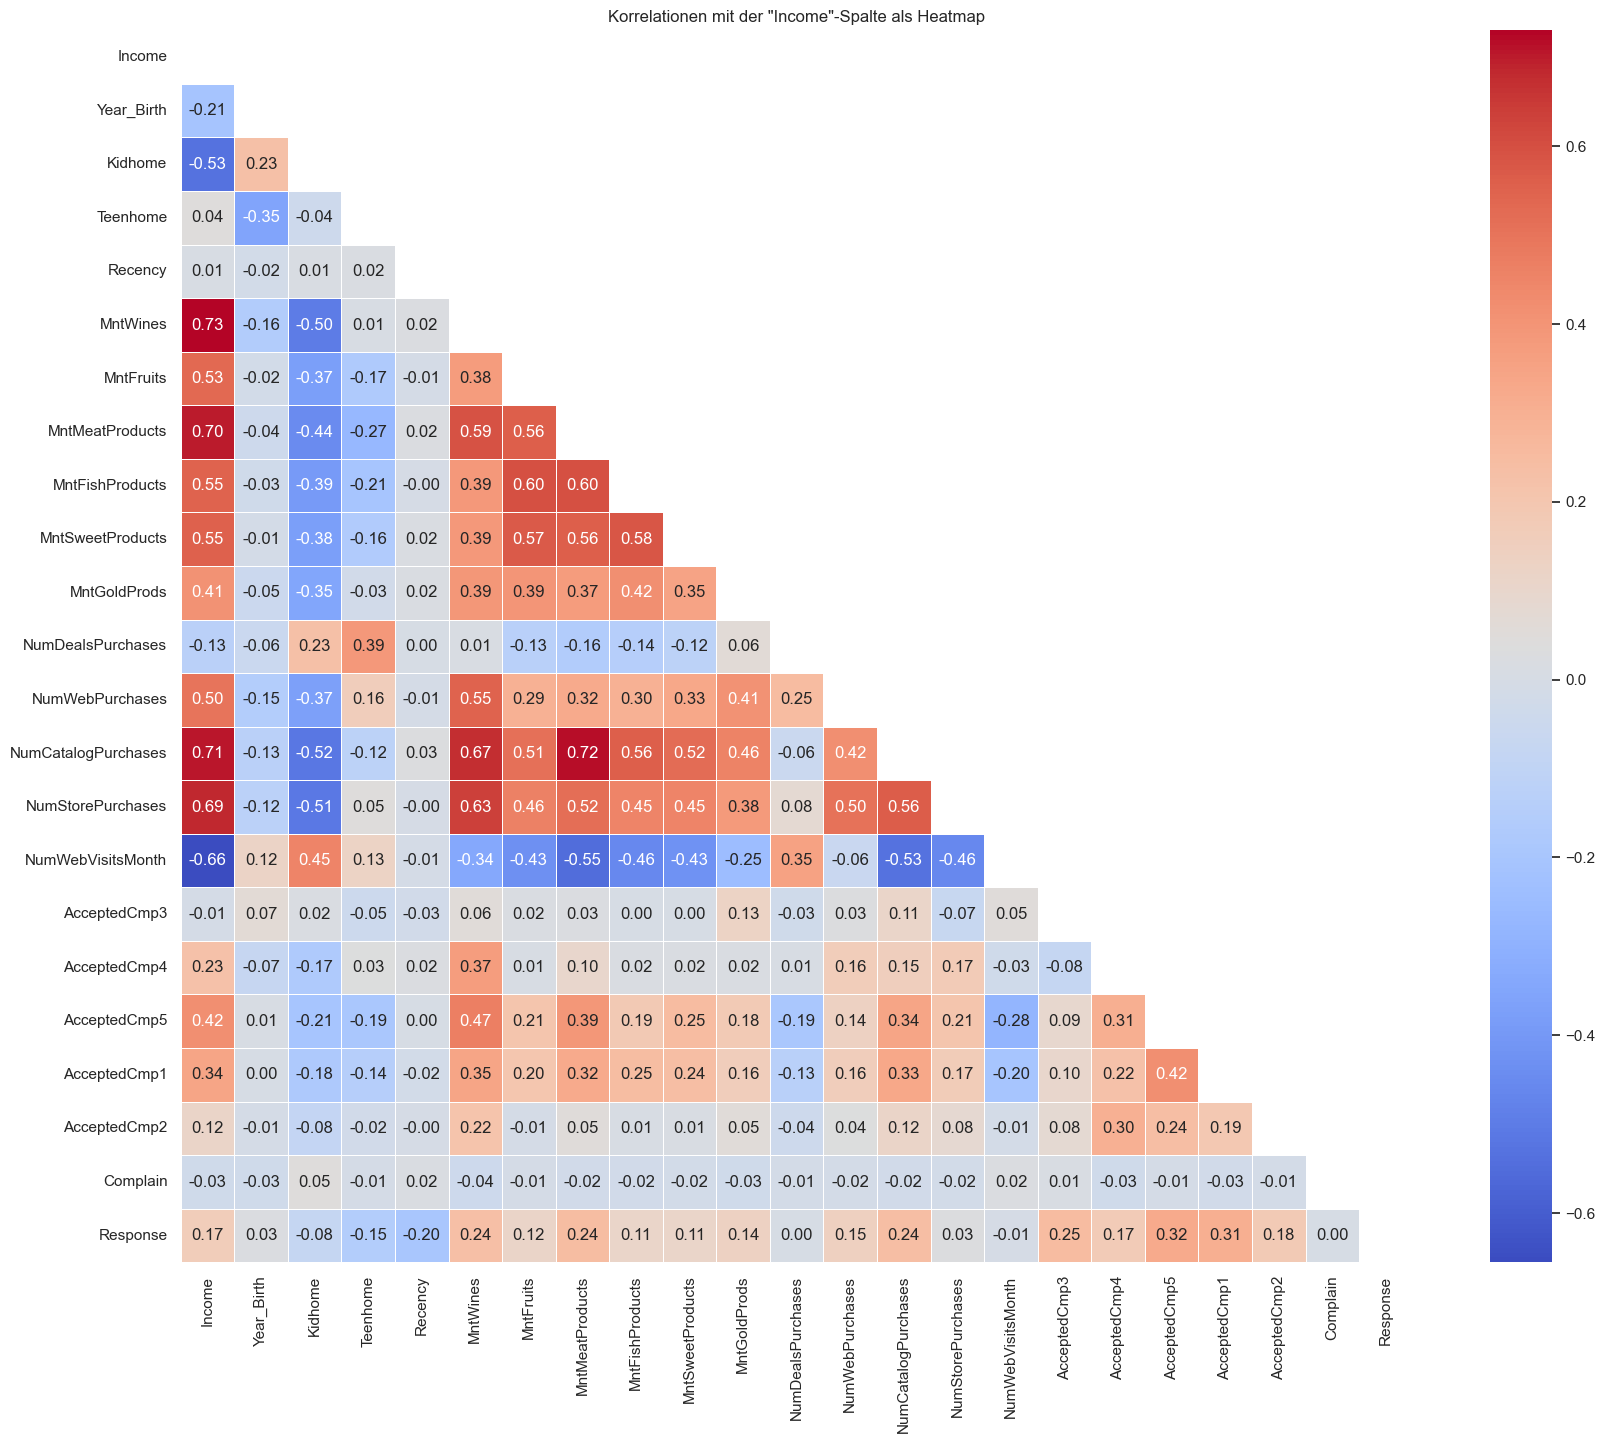

In [20]:
# Korrelationsanalyse aller numerischen Spalten

# Numerische Spalten ausgewählt
plot = df_EDA[['Income', 'Year_Birth', 'Kidhome',
               'Teenhome', 'Recency', 'MntWines', 'MntFruits',
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
               'AcceptedCmp2', 'Complain', 'Response']]

# Korrelationsmatrix berechnen
korrelationsmatrix = plot.corr()

# Maske für die obere Dreiecksmatrix erstellen
mask = np.triu(np.ones_like(korrelationsmatrix, dtype=bool))

# Heatmap mit Maske erstellen
plt.figure(figsize=(20, 16))
sns.heatmap(korrelationsmatrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Diagrammtitel hinzufügen
plt.title('Korrelationen mit der "Income"-Spalte als Heatmap')

# Speichern der Abbildung als JPG-Datei
plt.savefig('heatmap.jpg', format='jpg', dpi=300)

plt.show()

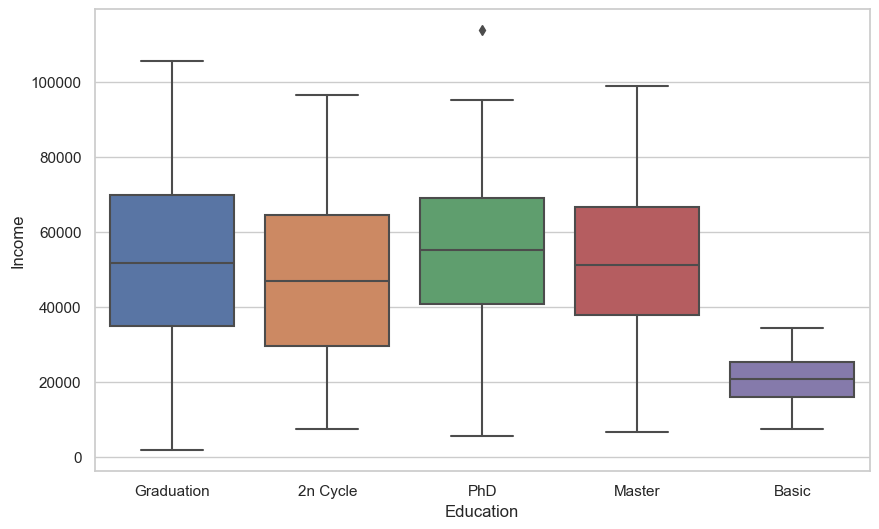

Das Bildungsniveau hat einen signifikanten Einfluss auf das Einkommen (p-Wert < 0,05).
                 sum_sq      df        F        PR(>F)
Education  5.374201e+10     4.0  33.7662  2.719083e-27
Residual   7.890316e+11  1983.0      NaN           NaN


In [21]:
#Visualisierung der Spalte Education im Boxplot nach Einkommen
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.boxplot(x='Education', y='Income', data=df_EDA)

#plt.title('Boxplot der Einkommen nach Bildungsniveau')
plt.xlabel('Education')
plt.ylabel('Income')

plt.show()

# ANOVA-Test zur Untersuchung des Einflusses des Bildungsniveaus auf das Einkommen
# Lineare Regression durchführen
model = ols('Income ~ Education', data=df_EDA).fit()

# ANOVA durchführen und die Ergebnisse anzeigen
anova_table = sm.stats.anova_lm(model, typ=2)

# Ausgabe der Ergebnisse
if anova_table['PR(>F)']['Education'] < 0.05:
    print('Das Bildungsniveau hat einen signifikanten Einfluss auf das Einkommen (p-Wert < 0,05).')
else:
    print('Der Einfluss des Bildungsniveaus auf das Einkommen ist statistisch nicht signifikant.')

print(anova_table)

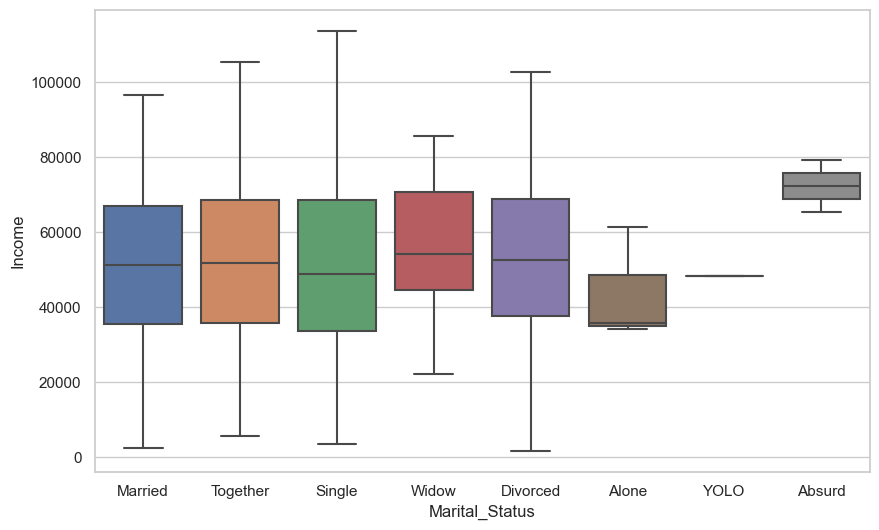

Der Einfluss des Familienstatus auf das Einkommen ist statistisch nicht signifikant.
                      sum_sq      df         F    PR(>F)
Marital_Status  3.303324e+09     7.0  1.113046  0.351856
Residual        8.394703e+11  1980.0       NaN       NaN


In [22]:
#Visualisierung der Spalte Familienstand im Boxplot nach Einkommen
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.boxplot(x='Marital_Status', y='Income', data=df_EDA)

#plt.title('Boxplot der Einkommen nach Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Income')

plt.show()

# ANOVA-Test zur Untersuchung des Einflusses des Familienstandes auf das Einkommen
# Lineare Regression durchführen
model = ols('Income ~ Marital_Status', data=df_EDA).fit()

# ANOVA durchführen und die Ergebnisse anzeigen
anova_table = sm.stats.anova_lm(model, typ=2)

# Ausgabe der Ergebnisse
if anova_table['PR(>F)']['Marital_Status'] < 0.05:
    print('Der Familienstatus hat einen signifikanten Einfluss auf das Einkommen (p-Wert < 0,05).')
else:
    print('Der Einfluss des Familienstatus auf das Einkommen ist statistisch nicht signifikant.')

print(anova_table)

## 3.7 One-Hot-Encoding

In [23]:
#One-Hot-Encoding für die Spalte Education
print(df_EDA['Education'].value_counts())
Education_encoding = pd.get_dummies(df_EDA['Education'])

df_preparation = pd.concat([df_EDA, Education_encoding], axis=1)
df_preparation[["2n Cycle", "Basic", "Graduation", "Master", "PhD"]].head()

Graduation    1003
PhD            434
Master         330
2n Cycle       175
Basic           46
Name: Education, dtype: int64


,2n Cycle,Basic,Graduation,Master,PhD
1951,0,0,1,0,0
1301,0,0,1,0,0
1622,1,0,0,0,0
1631,0,0,0,0,1
52,0,0,1,0,0


In [24]:
#Das gleiche ebenfalls für die Holdout Daten
Education_encoding = pd.get_dummies(df_hold['Education'])
df_hold = pd.concat([df_hold, Education_encoding], axis=1)

# Erstelle die 'Basic'-Spalte basierend auf der 'Education'-Spalte
df_income_NaN['Basic'] = df_income_NaN['Education'].apply(lambda x: 1 if x == 'Basic' else 0)

In [25]:
# Normalisieren der Daten
normal_columns = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', '2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']

scaler = StandardScaler()
df_normal[normal_columns] = scaler.fit_transform(df_preparation[normal_columns])

In [26]:
# Normalisieren der Holdout-Daten
df_hold[normal_columns] = scaler.fit_transform(df_hold[normal_columns])

# 4. Machine Learning

In [27]:
df_model = df_normal.copy()

In [28]:
# Liste der Features
features = ['Kidhome', 'Recency', 'MntWines', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'NumDealsPurchases',
            'NumWebPurchases', 'MntMeatProducts', 'NumStorePurchases', 'NumWebVisitsMonth', 'Basic']

## 4.1 Baum-Modelle

#### Test auf Train-Daten

In [29]:
# Features (X) und Zielvariable (y) auswählen
X = df_model[features]
y = df_model['Income']

# DataFrame in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelle initialisieren und trainieren
models = [
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42))
]

# Liste zum Speichern der MAE-Werte für die Trainwerte
mae_train_values = []

# Kreuzvalidierung für jedes Modell durchführen
print('Kreuzvalidierung')
for name, model in models:
    mae_scores = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    mae_mean = mae_scores.mean()
    mae_train_values.append(mae_mean)
    print(f'Mean Absolute Error {name}: {mae_mean}')

Kreuzvalidierung
Mean Absolute Error Decision Tree: 7308.215723270439
Mean Absolute Error Random Forest: 5664.9547735849055
Mean Absolute Error XGBoost: 5528.868766583137


#### Test auf Test-Daten

In [30]:
# Liste zum Speichern der MAE-Werte für die Testdaten
mae_test_values = []

print('Testen der Modelle')
for name, model in models:
    # Trainiere das Modell auf den Trainingsdaten
    model.fit(X_train, y_train)
    
    # Vorhersagen für die Testdaten
    y_pred = model.predict(X_test)
    
    # Berechne den MAE für die Testdaten
    mae = mean_absolute_error(y_test, y_pred)
    mae_test_values.append((mae))
    
    # Ergebnisse ausgeben
    print(f'Mean Absolute Error auf Testdaten für {name}: {mae:.4f}')

Testen der Modelle
Mean Absolute Error auf Testdaten für Decision Tree: 6982.1834
Mean Absolute Error auf Testdaten für Random Forest: 5417.2308
Mean Absolute Error auf Testdaten für XGBoost: 5465.9484


In [31]:
# Modelle auf dem gesamten Datensatz trainieren
trainierte_modelle = []

print('Training auf dem gesamten Datensatz')
for name, model in models:
    model.fit(X, y)  # Trainiere das Modell auf dem gesamten Datensatz
    trainierte_modelle.append((name, model))
    print(f'Modell trainiert: {name}')

Training auf dem gesamten Datensatz
Modell trainiert: Decision Tree
Modell trainiert: Random Forest
Modell trainiert: XGBoost


#### Test auf Holdout-Daten

In [32]:
# Features (X) und Zielvariable (y) auswählen
X_hold = df_hold[features]
y_hold = df_hold['Income']

# Liste zum Speichern der MAE-Werte für die Holdout-Daten
mae_hold_values = []

print('Leistungsbewertung auf Holdout-Daten')
for name, model in models:
    # Vorhersagen auf den Holdout-Daten
    y_pred = model.predict(X_hold)
    
    # Berechnung des MAE zwischen den vorhergesagten und den tatsächlichen Werten
    mae = mean_absolute_error(y_hold, y_pred)
    mae_hold_values.append((mae))
    
    print(f'Mean Absolute Error von {name} auf Holdout-Daten: {mae}')

Leistungsbewertung auf Holdout-Daten
Mean Absolute Error von Decision Tree auf Holdout-Daten: 9264.036036036036
Mean Absolute Error von Random Forest auf Holdout-Daten: 7694.323108108108
Mean Absolute Error von XGBoost auf Holdout-Daten: 8153.674445624824


## 4.2 Polynomial-Regression

#### Test auf Trainings-Daten

In [37]:
# Features (X) und Zielvariable (y) auswählen
X_ = df_model[['MntWines', 'MntMeatProducts']]
y_ = df_model['Income']

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

# Polynomiale Features und Modell in einer Pipeline erstellen
model_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Modell mit Trainingsdaten trainieren
model_poly.fit(X_train, y_train)

# Kreuzvalidierung für MAE (Mean Absolute Error) auf den Trainingsdaten
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv_scores_mae = cross_val_score(model_poly, X_train, y_train, cv=5, scoring=mae_scorer)

# Die negativen MAE-Werte in positive umwandeln
cv_scores_mae = -cv_scores_mae

# Modellleistung auf Train-Daten bewerten
y_pred_train = model_poly.predict(X_train)
mae_train_poly = mean_absolute_error(y_train, y_pred_train)

# Modellleistung auf Test-Daten bewerten
y_pred_test = model_poly.predict(X_test)
mae_test_poly = mean_absolute_error(y_test, y_pred_test)

print('Leistung auf Testdaten:')
print(f'Mean Absolute Error (MAE) auf Train-Daten: {mae_train_poly}')
print(f'Mean Absolute Error (MAE) auf Test-Daten: {mae_test_poly}')

Leistung auf Testdaten:
Mean Absolute Error (MAE) auf Train-Daten: 8464.439548420076
Mean Absolute Error (MAE) auf Test-Daten: 7764.538530629713


#### Test auf Holdout-Daten

In [38]:
# Holdout-Daten vorbereiten
X_hold_poly = df_hold[['MntWines', 'MntMeatProducts']]
y_hold_poly = df_hold['Income']

# Modell mit dem gesamten Trainingsdatensatz trainieren
model_poly.fit(X_, y_)

# Vorhersagen auf Holdout-Daten machen
y_pred_hold_poly = model_poly.predict(X_hold_poly)

# MAE auf Holdout-Daten berechnen
mae_hold_poly = mean_absolute_error(y_hold_poly, y_pred_hold_poly)
print(f'Mean Absolute Error Polynomial Regression auf Holdout-Daten: {mae_hold_poly}')

Mean Absolute Error Polynomial Regression auf Holdout-Daten: 9398.266585880832


# 5. Ergebnisse

## 5.1 Vergleich verschiedener Modelle | Test- zu Holdout-Daten

#### Baum-Modelle

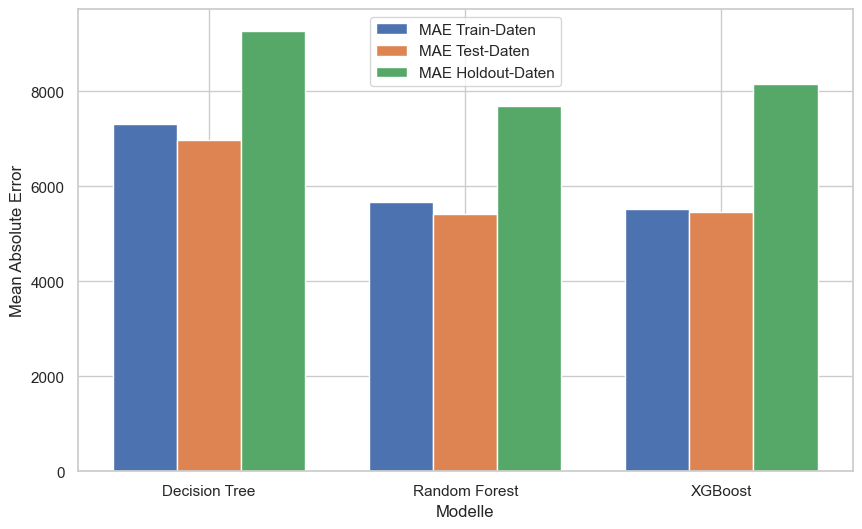

           Model  MAE Train  MAE Test  MAE Holdout
0  Decision Tree    7308.22   6982.18      9264.04
1  Random Forest    5664.95   5417.23      7694.32
2        XGBoost    5528.87   5465.95      8153.67


In [39]:
#Visualisierung des Mean Absolute Errors für die Modelle

# Modellnamen
model_names = ['Decision Tree', 'Random Forest', 'XGBoost']

# Runden der MAE-Werte auf zwei Dezimalstellen
mae_train_values_gerundet = [round(wert, 2) for wert in mae_train_values]
mae_test_values_gerundet = [round(wert, 2) for wert in mae_test_values]
mae_hold_values_gerundet = [round(wert, 2) for wert in mae_hold_values]

# Daten in DataFrame für die Tabelle umwandeln
data = {'Model': model_names, 'MAE Train': mae_train_values_gerundet, 'MAE Test': mae_test_values_gerundet, 'MAE Holdout': mae_hold_values_gerundet}
df_table = pd.DataFrame(data)

# Balkendiagramm erstellen
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = np.arange(len(model_names))

bar1 = ax.bar(index, mae_train_values_gerundet, bar_width, label='MAE Train-Daten')
bar2 = ax.bar(index + bar_width, mae_test_values_gerundet, bar_width, label='MAE Test-Daten')
bar3 = ax.bar(index + bar_width * 2, mae_hold_values_gerundet, bar_width, label='MAE Holdout-Daten')

ax.set_xlabel('Modelle')
ax.set_ylabel('Mean Absolute Error')
#ax.set_title('Mean Absolute Error für Train-, Test- und Holdout-Daten nach Modellen')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names)
ax.legend()

# Tabelle und Balkendiagramm anzeigen
plt.show()
print(df_table)

In [50]:
# DataFrame für die Ergebnisse erstellen
results = pd.DataFrame()
results['Holdout_Income'] = y_hold

for name, model in models:
    # Vorhersagen zum DataFrame hinzufügen
    results[f'Income_{name}'] = y_pred

# Ergebnisse anzeigen
#results[results["Holdout_Income"]>120000]
results.sort_values(by='Holdout_Income', ascending=False)

,Holdout_Income,Income_Decision Tree,Income_Random Forest,Income_XGBoost
687,160803.0,40866.824219,40866.824219,40866.824219
1300,157733.0,26963.433594,26963.433594,26963.433594
203,102160.0,89680.890625,89680.890625,89680.890625
2012,96876.0,84883.882812,84883.882812,84883.882812
1031,91700.0,93621.429688,93621.429688,93621.429688
...,...,...,...,...
1138,10979.0,39052.007812,39052.007812,39052.007812
439,7500.0,24760.455078,24760.455078,24760.455078
862,7500.0,31067.636719,31067.636719,31067.636719
2222,7500.0,24608.925781,24608.925781,24608.925781


#### Polynomiale Regression

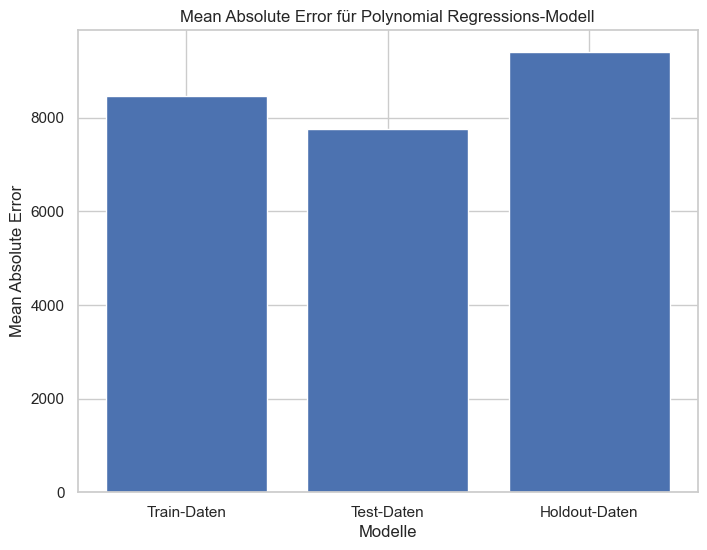

,Model,Train-Daten,Test-Daten,Holdout-Daten
0,Polynomial Regression,8464.44,7764.54,9398.27


In [40]:
#Visualisierung des Mean Absolute Errors für die Polynomiale Regression

# Modelle und ihre Mean Absolute Errors
models_meat_poly = ['Train-Daten', 'Test-Daten', 'Holdout-Daten']
mae_values_meat_poly = [mae_train_poly, mae_test_poly, mae_hold_poly]

# Daten in DataFrame für die Tabelle umwandeln
data_poly = {'Model': 'Polynomial Regression', 'Train-Daten': [round(mae_train_poly,2)], 'Test-Daten': [round(mae_test_poly,2)], 'Holdout-Daten': [round(mae_hold_poly,2)]}
df_table_poly = pd.DataFrame(data_poly)

# Balkendiagramm erstellen
plt.figure(figsize=(8, 6))

plt.bar(models_meat_poly, mae_values_meat_poly)
plt.xlabel('Modelle')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error für Polynomial Regressions-Modell')

#Tabelle anzeigen
plt.show()
df_table_poly

#### Das Random Forest Modell liefert die besten Ergebnisse.

## 5.2 Fehlende Einkommen mit dem Model schätzen

In [41]:
#Vorhersagen für fehlende Einkommens-Werte
X_pred = df_income_NaN[features]

# Vorhersagen für df_income_NaN machen
RF = RandomForestRegressor(random_state=42)
RF.fit(X, y)
y_pred_RF_NaN = RF.predict(X_pred)

# Füge die vorhergesagten Werte zur 'Income'-Spalte von df_income_NaN hinzu
df_income_NaN['Income'] = y_pred_RF_NaN

# Zeige die aktualisierten DataFrame-Werte an
df_income_NaN['Income']

10      78042.72
27      78633.17
43      75280.33
48      77810.14
58      77020.98
71      77950.00
90      77850.73
91      78687.03
92      75913.38
128     76666.72
133     75651.48
312     75651.48
319     77710.87
1379    75749.90
1382    77285.32
1383    79068.10
1386    79249.76
2059    77850.73
2061    77973.38
2078    79201.31
2079    75955.68
2081    75772.30
2084    75961.57
2228    80540.26
Name: Income, dtype: float64

In [42]:
# Ersetze die 'Income'-Werte in df mit den Werten aus df_income_NaN basierend auf dem Index
df.loc[df_income_NaN.index, 'Income'] = df_income_NaN['Income']

# Zeige die aktualisierten DataFrame-Werte an
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [43]:
#Zählen der NaN Werte des df pro Spalte
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Nach der Aktualisierung der Spalte 'Income' sind keine fehlenden Werte mehr vorhanden.